## k-Nearest Neighbor (kNN)

## kNN Regression

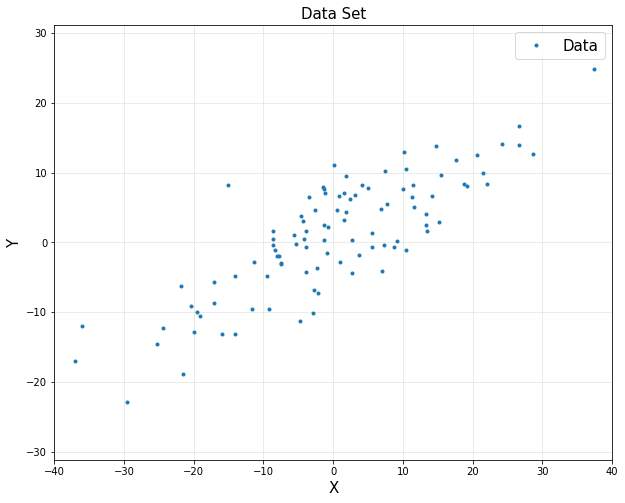

In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 100
w1 = 0.5
w0 = 2
x = np.random.normal(0, 15, N).reshape(-1,1)
y = w1*x + w0 + 5*np.random.normal(0, 1, N).reshape(-1,1)

plt.figure(figsize = (10, 8))
plt.title('Data Set', fontsize = 15)
plt.plot(x, y, '.', label = 'Data')
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.legend(fontsize = 15)
plt.axis('equal')
plt.axis([-40, 40, -30, 30])
plt.grid(alpha = 0.3)
plt.show()

In [44]:
from sklearn import neighbors

reg = neighbors.KNeighborsRegressor(n_neighbors = 1)
reg.fit(x, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

In [46]:
x_new = np.array([[5]])
pred = reg.predict(x_new)[0,0] 
print(pred)

7.804616118233776


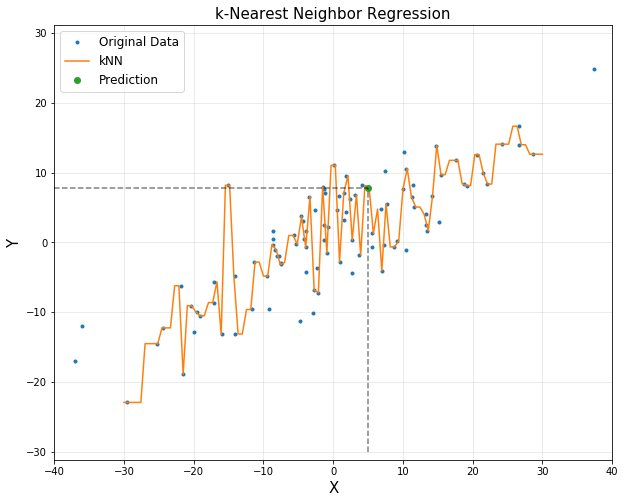

In [47]:
xp = np.linspace(-30, 30, 100).reshape(-1, 1)
yp = reg.predict(xp)

plt.figure(figsize = (10, 8))
plt.title('k-Nearest Neighbor Regression', fontsize = 15)
plt.plot(x, y, '.', label = 'Original Data')
plt.plot(xp, yp, label = 'kNN')
plt.plot(x_new, pred, 'o', label = 'Prediction')
plt.plot([x_new[0,0], x_new[0,0]], [-30, pred], 'k--', alpha = 0.5)
plt.plot([-40, x_new[0,0]], [pred, pred], 'k--', alpha = 0.5)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.legend(fontsize = 12)
plt.axis('equal')
plt.axis([-40, 40, -30, 30])
plt.grid(alpha = 0.3)
plt.show()

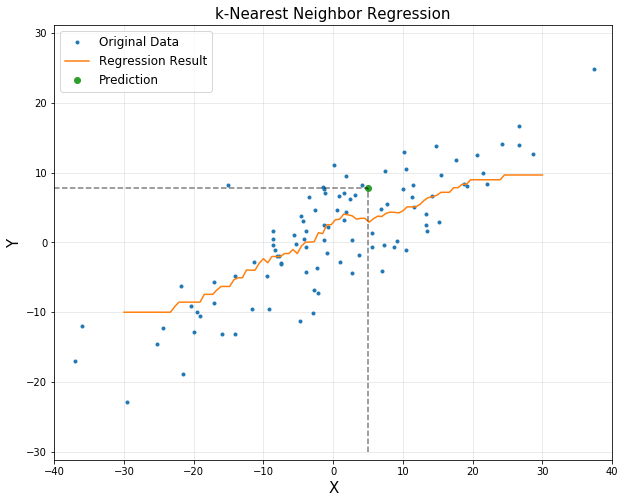

In [51]:
reg = neighbors.KNeighborsRegressor(n_neighbors = 21)
reg.fit(x, y)

xp = np.linspace(-30, 30, 100).reshape(-1, 1)
yp = reg.predict(xp)

plt.figure(figsize = (10, 8))
plt.title('k-Nearest Neighbor Regression', fontsize=15)
plt.plot(x, y, '.', label='Original Data')
plt.plot(xp, yp, label = 'Regression Result')
plt.plot(x_new, pred, 'o', label='Prediction')
plt.plot([x_new[0,0], x_new[0,0]], [-30, pred], 'k--', alpha=0.5)
plt.plot([-40, x_new[0,0]], [pred, pred], 'k--', alpha=0.5)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.legend(fontsize = 12)
plt.axis('equal')
plt.axis([-40, 40, -30, 30])
plt.grid(alpha = 0.3)
plt.show()

## kNN Classification

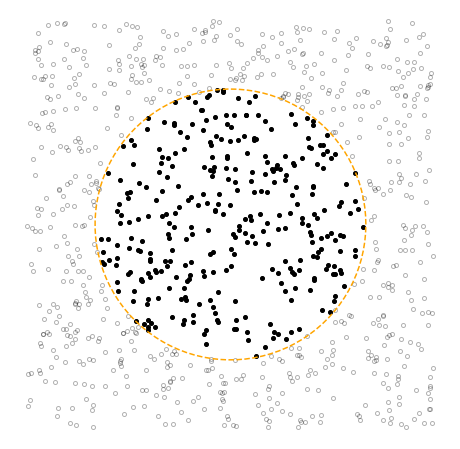

In [52]:
m = 1000
X = -1.5 + 3*np.random.uniform(size = (m,2))

y = np.zeros([m,1])
for i in range(m):
    if np.linalg.norm(X[i,:], 2) <= 1:
        y[i] = 1      

C1 = np.where(y == 1)[0]
C0 = np.where(y == 0)[0]

theta = np.linspace(0, 2*np.pi, 100)

plt.figure(figsize = (8,8))
plt.plot(X[C1,0], X[C1,1], 'o', label = 'C1', markerfacecolor = "k", markeredgecolor = 'k', markersize = 4)
plt.plot(X[C0,0], X[C0,1], 'o', label = 'C0', markerfacecolor = "None", alpha = 0.3, markeredgecolor = 'k', markersize = 4)
plt.plot(np.cos(theta), np.sin(theta), '--', color = 'orange')
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.axis('equal')
plt.axis('off')
plt.show()

In [53]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors = 1)
clf.fit(X, np.ravel(y))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [54]:
X_new = np.array([1, 1]).reshape(1,-1)
result = clf.predict(X_new)[0]
print(result)

0.0


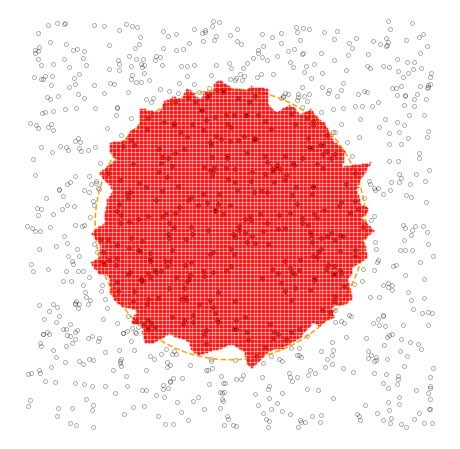

In [55]:
res = 0.01
[X1gr, X2gr] = np.meshgrid(np.arange(-1.5,1.5,res), np.arange(-1.5,1.5,res))

Xp = np.hstack([X1gr.reshape(-1,1), X2gr.reshape(-1,1)])
Xp = np.asmatrix(Xp)

inC1 = clf.predict(Xp).reshape(-1,1)
inCircle = np.where(inC1 == 1)[0]

plt.figure(figsize = (8, 8))
plt.plot(X[C1,0], X[C1,1], 'o', label = 'C1', markerfacecolor = "k", alpha = 0.5, markeredgecolor = 'k', markersize = 4)
plt.plot(X[C0,0], X[C0,1], 'o', label = 'C0', markerfacecolor = "None", alpha = 0.3, markeredgecolor='k', markersize = 4)
plt.plot(np.cos(theta), np.sin(theta), '--', color = 'orange')
plt.plot(Xp[inCircle][:,0], Xp[inCircle][:,1], 's', alpha = 0.5, color = 'r', markersize = 1)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.axis('equal')
plt.axis('off')
plt.show()   

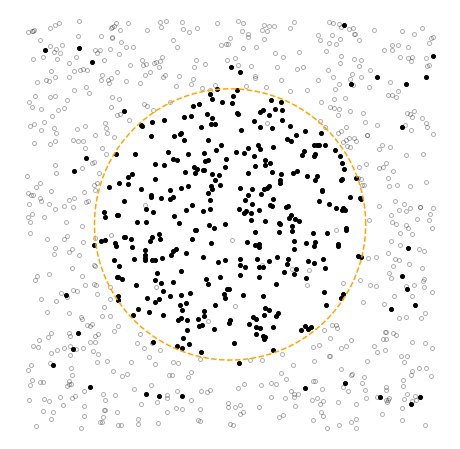

In [56]:
m = 1000
X = -1.5 + 3*np.random.uniform(size = (m,2))

y = np.zeros([m,1])
for i in range(m):
    if np.linalg.norm(X[i,:], 2) <= 1:
        if np.random.uniform() < 0.05:
            y[i] = 0
        else:
            y[i] = 1    
    else:
        if np.random.uniform() < 0.05:
            y[i] = 1
        else:
            y[i] = 0

C1 = np.where(y == 1)[0]
C0 = np.where(y == 0)[0]

theta = np.linspace(0, 2*np.pi, 100)

plt.figure(figsize = (8,8))
plt.plot(X[C1,0], X[C1,1], 'o', label = 'C1', markerfacecolor = "k", markeredgecolor = 'k', markersize = 4)
plt.plot(X[C0,0], X[C0,1], 'o', label = 'C0', markerfacecolor = "None", alpha = 0.3, markeredgecolor = 'k', markersize = 4)
plt.plot(np.cos(theta), np.sin(theta), '--', color = 'orange')
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.axis('equal')
plt.axis('off')
plt.show()

### k = 1

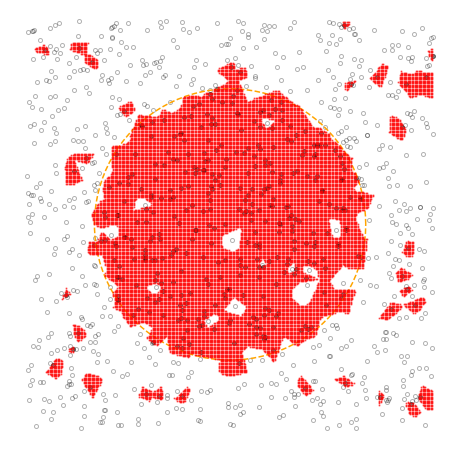

In [57]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 1)
clf.fit(X, np.ravel(y))

res = 0.01
[X1gr, X2gr] = np.meshgrid(np.arange(-1.5,1.5,res), np.arange(-1.5,1.5,res))

Xp = np.hstack([X1gr.reshape(-1,1), X2gr.reshape(-1,1)])
Xp = np.asmatrix(Xp)

inC1 = clf.predict(Xp).reshape(-1,1)
inCircle = np.where(inC1 == 1)[0]

plt.figure(figsize = (8, 8))
plt.plot(X[C1,0], X[C1,1], 'o', label = 'C1', markerfacecolor = "k", alpha = 0.5, markeredgecolor = 'k', markersize = 4)
plt.plot(X[C0,0], X[C0,1], 'o', label = 'C0', markerfacecolor = "None", alpha = 0.3, markeredgecolor='k', markersize = 4)
plt.plot(np.cos(theta), np.sin(theta), '--', color = 'orange')
plt.plot(Xp[inCircle][:,0], Xp[inCircle][:,1], 's', alpha = 0.5, color = 'r', markersize = 1)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.axis('equal')
plt.axis('off')
plt.show()   

## k = 11

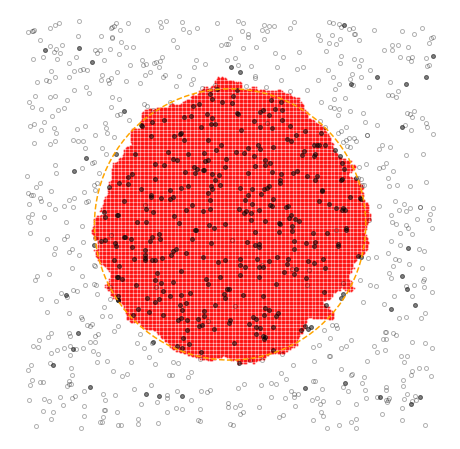

In [62]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 11)
clf.fit(X, np.ravel(y))

res = 0.01
[X1gr, X2gr] = np.meshgrid(np.arange(-1.5,1.5,res), np.arange(-1.5,1.5,res))

Xp = np.hstack([X1gr.reshape(-1,1), X2gr.reshape(-1,1)])
Xp = np.asmatrix(Xp)

inC1 = clf.predict(Xp).reshape(-1,1)
inCircle = np.where(inC1 == 1)[0]

plt.figure(figsize = (8, 8))
plt.plot(Xp[inCircle][:,0], Xp[inCircle][:,1], 's', alpha = 0.5, color = 'r', markersize = 1)
plt.plot(X[C1,0], X[C1,1], 'o', label = 'C1', markerfacecolor = "k", alpha = 0.5, markeredgecolor = 'k', markersize = 4)
plt.plot(X[C0,0], X[C0,1], 'o', label = 'C0', markerfacecolor = "None", alpha = 0.3, markeredgecolor='k', markersize = 4)
plt.plot(np.cos(theta), np.sin(theta), '--', color = 'orange')
# plt.legend(fontsize = 12)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.axis('equal')
plt.axis('off')
plt.show()   

## Iris Dataset

In [64]:
# Load libraries
from sklearn import datasets
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# Load data
iris = datasets.load_iris()
features = iris.data

# Create standardizer
standardizer = StandardScaler()

# Standardize features
features_standardized = standardizer.fit_transform(features)

# Two nearest neighbors
nearest_neighbors = NearestNeighbors(n_neighbors=2).fit(features_standardized)

# Create an observation
new_observation = [ 1, 1, 1, 1]

# Find distances and indices of the observation's nearest neighbors
distances, indices = nearest_neighbors.kneighbors([new_observation])

# View the nearest neighbors
features_standardized[indices]



array([[[1.03800476, 0.55861082, 1.10378283, 1.18556721],
        [0.79566902, 0.32841405, 0.76275827, 1.05393502]]])

In [65]:
# Find two nearest neighbors based on euclidean distance
nearestneighbors_euclidean = NearestNeighbors(n_neighbors=2, metric='euclidean').fit(features_standardized)

In [66]:
# View distances
distances

array([[0.49140089, 0.74294782]])

In [30]:
# Find each observation's three nearest neighbors
# based on euclidean distance (including itself)
nearestneighbors_euclidean = NearestNeighbors(n_neighbors=3, metric="euclidean").fit(features_standardized)

# List of lists indicating each observation's 3 nearest neighbors
# (including itself)
nearest_neighbors_with_self = nearestneighbors_euclidean.kneighbors_graph(features_standardized).toarray()

# Remove 1's marking an observation is a nearest neighbor to itself
for i, x in enumerate(nearest_neighbors_with_self):
    x[i] = 0

# View first observation's two nearest neighbors
nearest_neighbors_with_self[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

kNN Classifier

In [33]:
# Load libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Create standardizer
standardizer = StandardScaler()

# Standardize features

X_std = standardizer.fit_transform(X)

# Train a KNN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1).fit(X_std, y)

# Create two observations
new_observations = [[ 0.75, 0.75, 0.75, 0.75],
                    [ 1, 1, 1, 1]]

# Predict the class of two observations
knn.predict(new_observations)

array([1, 2])

In [34]:
# View probability each observation is one of three classes
knn.predict_proba(new_observations)

array([[0. , 0.6, 0.4],
       [0. , 0. , 1. ]])

In [ ]:
knn.predict(new_observations)


## Identifying the Best Neighborhood Size

In [67]:
# Load libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create standardizer
standardizer = StandardScaler()

# Standardize features
features_standardized = standardizer.fit_transform(features)

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

# Create a pipeline
pipe = Pipeline([("standardizer", standardizer), ("knn", knn)])

# Create space of candidate values
search_space = [{"knn__n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

# Create grid search
classifier = GridSearchCV(pipe, search_space, cv=5, verbose=1).fit(features_standardized, target)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.3s finished


In [68]:
# Best neighborhood size (k)
classifier.best_estimator_.get_params()["knn__n_neighbors"]

6

## Creating a Radius-Based Nearest Neighbor Classifier

In [69]:
# Load libraries
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create standardizer
standardizer = StandardScaler()

# Standardize features
features_standardized = standardizer.fit_transform(features)

# Train a radius neighbors classifier
rnn = RadiusNeighborsClassifier(radius=.5, n_jobs=-1).fit(features_standardized, target)

# Create two observations
new_observations = [[ 1, 1, 1, 1]]

# Predict the class of two observations
rnn.predict(new_observations)

array([2])

In [70]:
rnn

RadiusNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                          metric_params=None, n_jobs=-1, outlier_label=None,
                          p=2, radius=0.5, weights='uniform')